# Práctica 9. Clasificador Bayesiano y estimación rendimiento de clasificadores

Naive Bayes es una técnica de clasificación estadística basada en el Teorema de Bayes. Es uno de los algoritmos de aprendizaje supervisado más simples. El clasificador Naive Bayes es un algoritmo rápido, preciso y confiable. Los clasificadores Naive Bayes tienen una alta precisión y velocidad en conjuntos de datos grandes.

El clasificador Naive Bayes asume que el efecto de una característica particular en una clase es independiente de otras características.

Explicar en la pizarra como recordatorio de la teoría el clasificador MAP y el Naive Bayes como una simplificación del MAP donde las características son independientes unas de otras.

También recordar que en lugar de usar la verosimilitud se usa el log de la verosimilitud para cambiar las multiplicaciones de números menores que uno (al final se hace cero) por sumas.


## Clasificador bayesiano naive gaussiano

Cuando se trata de características con valores continuos la verosimilitud $P(x_i/y)$ se modela como una gaussiana. El clasificador bayesiano naive gaussiano se basa en una distribución continua caracterizada por su media y varianza. El modelo bayesiano naive gaussiano asume que los datos para cada etiqueta son extraídos de una distribución gaussiana simple.

En sklearn está implementado en la clase GaussianNB

**make_classification**

Es similar a make_blobs pero permite incluir características no informativas así como características redundantes. Además cada clase se puede modelar como un solo 
blobs o varios. Por defecto las características se ordenan aleatoriamente. Sin embargo si el argumento shuffle=False las características se ordenan según lo indicado
en el manual de la clase en sklearn, estando primero las informativas.

In [30]:
from sklearn.datasets import make_classification

n_clases = 3

X, y = make_classification(
    n_features=4,
    n_classes=n_clases,
    n_samples=500,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    shuffle=False,
    random_state=42
)

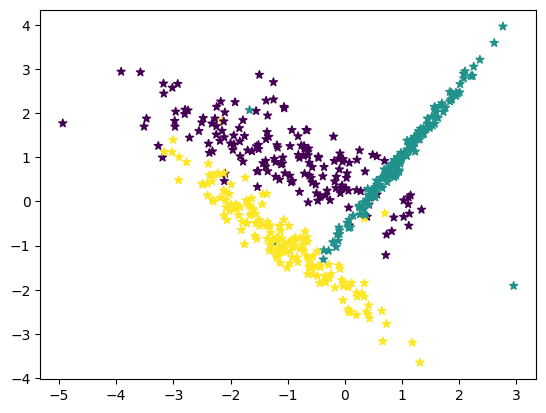

In [31]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*")

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=125)

clf = GaussianNB()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.1f}')

Exactitud: 90.0


Mostrar los parámetros de las gaussianas

La clase premite acceder a diferentes parámetros del modelo como: el número de muestras por clase, las probabilidades a priori de cada clase,

In [34]:
# Probabilidad de a priori de cada clase (P(y))
for clase in range(n_clases):
    print(f'Probabilidad a priori de la clase {clase}: {clf.class_prior_[clase]}')
print()

# media para cada clase y característica
for clase in range(n_clases):
    for caract in range(clf.n_features_in_):
        print(f'Media de la gaussiana para la clase {clase} caracteristica {caract}: {clf.theta_[clase, caract]}')
    print()

# varianza para cada clase y característica
for clase in range(n_clases):
    for caract in range(clf.n_features_in_):
        print(f'Varianza de la gaussiana para la clase {clase} caracteristica {caract}: {clf.var_[clase, caract]}')
    print()

Probabilidad a priori de la clase 0: 0.3225
Probabilidad a priori de la clase 1: 0.3225
Probabilidad a priori de la clase 2: 0.355

Media de la gaussiana para la clase 0 caracteristica 0: -0.9978433218069778
Media de la gaussiana para la clase 0 caracteristica 1: 0.9792514589714161
Media de la gaussiana para la clase 0 caracteristica 2: 0.10953170645131959
Media de la gaussiana para la clase 0 caracteristica 3: 0.05678019179388464

Media de la gaussiana para la clase 1 caracteristica 0: 0.9795792571021118
Media de la gaussiana para la clase 1 caracteristica 1: 0.976649679617569
Media de la gaussiana para la clase 1 caracteristica 2: 0.10229582906983123
Media de la gaussiana para la clase 1 caracteristica 3: 0.054323185558234094

Media de la gaussiana para la clase 2 caracteristica 0: -1.1398432899655941
Media de la gaussiana para la clase 2 caracteristica 1: -0.8403493213828757
Media de la gaussiana para la clase 2 caracteristica 2: -0.023820659958350397
Media de la gaussiana para la c

Dibujar las distribuciones likelihood p(x/y) para la primera característica

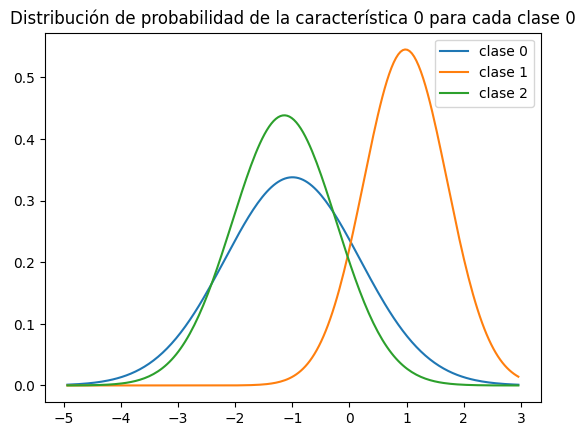

In [35]:
import numpy as np
from scipy.stats import norm


x = np.linspace(X[:,0].min(), X[:,0].max(), 200)

clase = 1
caract = 0
for clase in range(n_clases):
    media = clf.theta_[clase, caract]
    desv_std = np.sqrt(clf.var_[clase,caract])
    plt.plot(x, norm.pdf(x, loc=media, scale=desv_std))
plt.legend(['clase 0', 'clase 1', 'clase 2'])
plt.title('Distribución de probabilidad de la característica 0 para cada clase 0')
plt.show()


**Ejercicio de clase**

Dibujar las distribuciones para el resto de las características y comprobar que para la tercera y cuarta característica son irrelevante porque no muestran ninguna distribución centrada en ninguna clase y se superponen todas

#### Solución

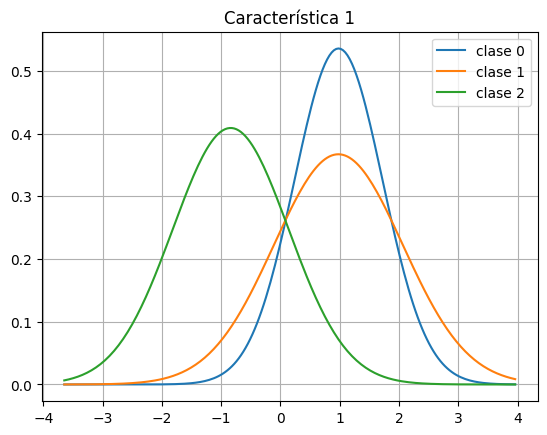

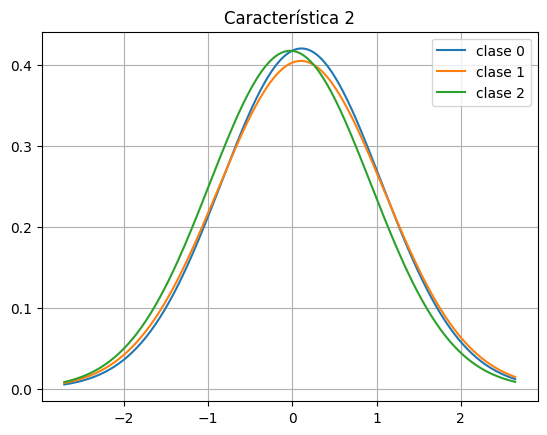

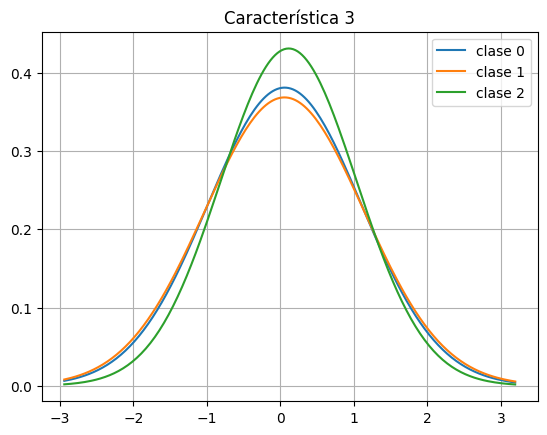

In [36]:
for caract in range(1, clf.n_features_in_):
    x = np.linspace(X[:,caract].min(), X[:,caract].max(), 200)

    for clase in range(n_clases):
        media = clf.theta_[clase, caract]
        desv_std = np.sqrt(clf.var_[clase,caract])
        plt.plot(x, norm.pdf(x, loc=media, scale=desv_std))
    plt.title(f'Característica {caract}')
    plt.legend(['clase 0', 'clase 1', 'clase 2'])
    plt.grid()
    plt.show()


## Bernoulli Naive Bayes Classifier

El clasificador bayesiano naive de Bernoulli es un algoritmo binario. Es útil cuando necesitamos verificar si una característica está presente o no.Es muy utilizado en procesamiento de lenguaje natural donde se define un vocabulario de palabras y cada texto viene definido por un vector con tantos elementos como palabras contiene el vocabulario y cada vector está compuesto por 0 y 1, donde 0 indica que la palabra no está en el texto y 1 que si aparece en el texto. Por tanto, la distribución de probabilidad se modela como una distribución de Bernoulli en lugar de una normal como en el caso anterior.

Este clasificador está implementado en sklearn en la clase BernoulliNB. En el caso de que no sea binario el problema, se utiliza el valor del argumento binarize para realizar la conversión de 0 y 1 de los datos. Si el valor de una característica está por encima del valor de binarize se pone a uno, de lo contrario se pone a cero. Este valor para binarizar se puede 

In [37]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB


df = pd.read_csv('datos/spam_preprocesado_binario.csv')
df.head()

X = df.values[:,1:]
y = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)


In [38]:
clf = BernoulliNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)

print(f'Exactitud: {exactitud*100:.1f}')

Exactitud: 97.6


**Ejercicio de clase**

Entrenar un clasificador NB gaussiano y comprobar el resultado

#### Solución

In [39]:
clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.1f}')

Exactitud: 69.5


## Matriz de confusión

In [40]:
df = pd.read_csv('datos/datos11.csv')
print(df['clase'].unique())
df.head(10)

['clase_2' 'clase_1']


,x1,x2,x3,x4,x5,clase
0,-3.050291,-2.283888,-1.946037,-7.943166,7.317425,clase_2
1,-2.922005,-3.111957,-0.895180,-8.450836,6.994981,clase_2
2,-3.606929,-3.571645,-1.350695,-8.793976,7.991305,clase_2
3,8.660994,5.013618,-4.034676,6.625171,-3.874373,clase_1
4,-3.704334,-3.260765,-1.780351,-8.608026,6.331399,clase_2
5,9.437817,5.458538,-4.409931,5.376527,-3.872942,clase_2
6,-2.350586,-3.350673,-2.931353,-9.287377,7.207969,clase_2
7,-3.747336,-3.829182,0.100633,-9.409558,7.097507,clase_2
8,9.892475,2.891303,-4.671199,7.190489,-2.664146,clase_1
9,-4.209178,-3.152833,-0.495621,-8.394132,7.907543,clase_2


In [41]:
X = df.values[:,:-1]
y = df.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2460)

Entrenar dos clasificadores y comparar exactitud

In [42]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud SVC: {exactitud*100:.1f}')

Exactitud SVC: 76.0


In [43]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud Regresión Logística: {exactitud*100:.1f}')

Exactitud Regresión Logística: 75.0


Ambos clasificadores muestran casi la misma exactitud por lo que los resultados son comparables

Mostrar matriz de confusión. 

IMPORTANTE: Filas y columnas diferente a vistas en clase. Filas: valor real, Columnas: valor predicho

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Exactitud SVC: 76.0
Matriz de confusión SVC
[[ 0 24]
 [ 0 76]]
['clase_1' 'clase_2']


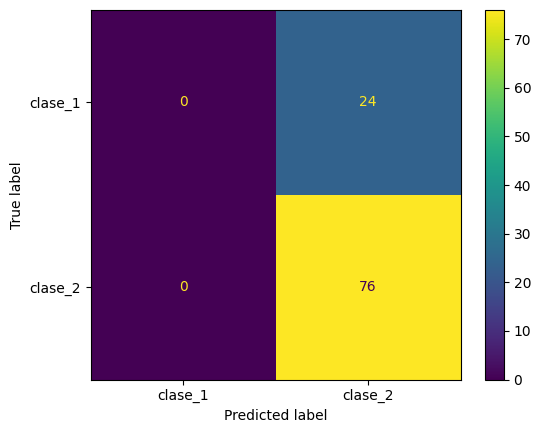

In [45]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud SVC: {exactitud*100:.1f}')

cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión SVC')
print(cm)

print(clf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Exactitud Regresión Logística: 75.0
Matriz de confusión Regresión Logística
[[10 14]
 [11 65]]


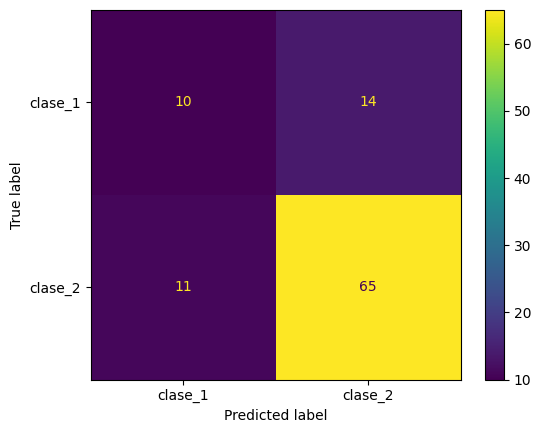

In [46]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud Regresión Logística: {exactitud*100:.1f}')

cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión Regresión Logística')
print(cm)

disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Precision, Sensibilidad, Medida F1

Medidas obtenidas a partir de la matriz de confusión

Precision, sensibilidad (recall), Medida F1. Es necesario definir cual es la clase positiva para obtener los TP, FP y FN

Por defecto las funciones precision_score, recall_score y f1_score asumen un problema biclásico

- recall = tp / (tp + fn) = mide la capacidad del modelo para encontrar todos los ejemplos positivos.
- precision = tp / (tp + fp) = mide la proporción de ejemplos predichos como positivos que realmente son positivos.
- f1 = 2* (precicion*recall) / (precision+recall) = es la media armónica entre la precisión y el recall, ofreciendo un balance entre ambas métricas.

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [48]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)

print(clf.classes_)

print(f'Exactitud SVC: {exactitud*100:.1f}')
print(f'Precisión SVC: {precision_score(y_test, y_pred, pos_label=clf.classes_[0]):.1f}')
print(f'Sensibilidad SVC: {recall_score(y_test, y_pred, pos_label=clf.classes_[0]):.1f}')
print(f'Medida F1: {f1_score(y_test, y_pred, pos_label=clf.classes_[0]):.1f}')

['clase_1' 'clase_2']
Exactitud SVC: 76.0
Precisión SVC: 0.0
Sensibilidad SVC: 0.0
Medida F1: 0.0


/home/miguel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)

print(clf.classes_)

print(f'Exactitud KNN: {exactitud*100:.1f}')

print(f'Precisión KNN: {precision_score(y_test, y_pred, pos_label=clf.classes_[0]):.1f}')
print(f'Sensibilidad KNN: {recall_score(y_test, y_pred, pos_label=clf.classes_[0]):.1f}')
print(f'Medida F1: {f1_score(y_test, y_pred, pos_label=clf.classes_[0]):.1f}')


['clase_1' 'clase_2']
Exactitud KNN: 75.0
Precisión KNN: 0.5
Sensibilidad KNN: 0.4
Medida F1: 0.4


**Ejercicio de clase**

Obtener las medidas precision, exhaustividad y F1 considerando como clase positiva "clase_2"

### Classification report

Se puede obtener un resumen y una medida ponderada utilizando las función classification_report

'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted': Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).

In [50]:
from sklearn.metrics import classification_report

clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, labels=clf.classes_))

              precision    recall  f1-score   support

     clase_1       0.48      0.42      0.44        24
     clase_2       0.82      0.86      0.84        76

    accuracy                           0.75       100
   macro avg       0.65      0.64      0.64       100
weighted avg       0.74      0.75      0.74       100



## Comparación rendimiento clasificadores datos reales

Evaluar diferentes clasificadores con el conjunto de datos CelebA-1K

In [51]:
df_train = pd.read_csv('datos/CelebA-1K-train.csv')
df_test = pd.read_csv('datos/CelebA-1K-test.csv')

X_train = df_train.values[:,2:]
y_train = df_train.values[:,1]

X_test = df_test.values[:,2:]
y_test = df_test.values[:,1]


In [52]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.1f}')
print(classification_report(y_test, y_pred, labels=clf.classes_))

Exactitud: 86.2
              precision    recall  f1-score   support

      female       0.88      0.89      0.88       581
        male       0.84      0.83      0.83       419

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



In [53]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.1f}')
print(classification_report(y_test, y_pred, labels=clf.classes_))

Exactitud: 89.9
              precision    recall  f1-score   support

      female       0.91      0.92      0.91       581
        male       0.88      0.87      0.88       419

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [54]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, labels=clf.classes_))

              precision    recall  f1-score   support

      female       0.74      0.97      0.84       581
        male       0.93      0.54      0.68       419

    accuracy                           0.79      1000
   macro avg       0.83      0.75      0.76      1000
weighted avg       0.82      0.79      0.77      1000



## Espacio ROC

Recordar espacio ROC => dibujar FPR (eje X) frente a TPR (eje Y)

- TPR = tp / p
- FPR = fp / n

Obtener el FPR y el TPR de un clasificador y mostrarlo en el espacio roc

[[515  66]
 [ 72 347]]


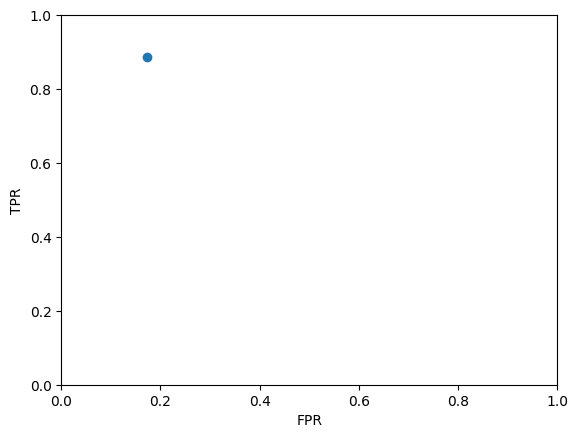

In [55]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
tpr = cm[0,0] / (cm[0,0] + cm[0,1])
fpr = cm[1,0] / (cm[1,0] + cm[1,1])

plt.scatter(fpr, tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**Ejercicio de clase**

Entrenar GaussianNB y BernoulliNB para el dataset de caras y mostrar los resultados en el espacio ROC, la matriz de confusión y el classification report